# I. Import embeddings and useful functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data_loading import load_data_from_path_en_fr, index_to_drop, normalize_matrix_by_row
from src.optimisation_functions import gradient_descent, batch_gradient_descent, batch_gradient_descent_full_procustes, gradient_descent_projected
from src.test_functions_fixed import get_nn_scores_fixed, test_translation_fixed

In [3]:
import fasttext
import numpy as np 
np.random.seed(42) #to fix randomness
import matplotlib.pyplot as plt

# II. Load data

In [4]:
#files obtain from pre-treatement related to Hamza's work
words_train_en = np.load('imports/en->fr/train_words_eng_fr.npy')
words_train_fr = np.load('imports/en->fr/Words_eng_fr_train.npy')
X_train = np.load('imports/en->fr/X_train_eng_fr.npy')
Y_train = np.load('imports/en->fr/Y_train_eng_fr.npy')

words_test_en = np.load('imports/en->fr/test_words_eng_fr.npy')
words_test_fr = np.load('imports/en->fr/Words_eng_fr_test.npy')
X_test = np.load('imports/en->fr/X_test_eng_fr.npy')
Y_test = np.load('imports/en->fr/Y_test_eng_fr.npy')

In [8]:
X_train_normalized, Y_train_normalized = normalize_matrix_by_row(X_train), normalize_matrix_by_row(Y_train) 
X_test_normalized, Y_test_normalized = normalize_matrix_by_row(X_test), normalize_matrix_by_row(Y_test)

In [9]:
#for testing various numerical treatments
words_test_full_fr =  np.concatenate((words_test_fr, words_train_fr))
Y_test_full = np.vstack((Y_test, Y_train))
Y_test_full_normalized = np.vstack((Y_test_normalized, Y_train_normalized))

# III. Numerical Treatment

### 0. Gradient descent with Euler distance and no constraints (SGD - limited iteration)

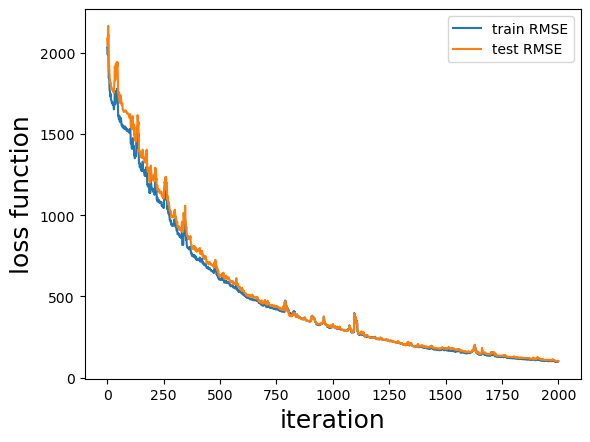

In [10]:
#first we try a solution a quick solution with 1000 iteration, we well later use it for comparison with another method
nb_of_iterations = 2000
step_size = 0.01

W_opt_full_gd,iteration,loss_function_train_array_full_gd, loss_function_test_array_full_gd  = batch_gradient_descent(X_train, Y_train, X_test, Y_test, nb_of_iterations, step_size, batch_percentage=0.0001, early_stopping=False)

plt.plot(iteration, loss_function_train_array_full_gd, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_full_gd, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [11]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation

get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_en, src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, epsilon = 1e-7)

Nearest neighbors of "bicycle":
0.2611 - financé
0.2576 - camionnette
0.2576 - camionnette
0.2561 - courroie
0.2522 - transporteurs


##### b. Test on a the whole test set

In [12]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, limit= 3000)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 39.6 %


In [13]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=1, limit= 3000)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 24.4 %


### 1. Gradient descent with Euler distance and no constraints (SGD)

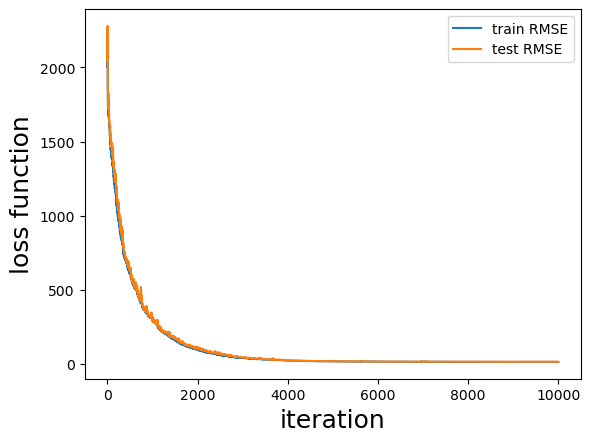

In [14]:
#high number of iteration
nb_of_iterations = 10000
step_size = 0.01

W_opt_full_gd,iteration,loss_function_train_array_full_gd, loss_function_test_array_full_gd  = batch_gradient_descent(X_train, Y_train, X_test, Y_test, nb_of_iterations, step_size, batch_percentage = 0.0001, early_stopping=False)

plt.plot(iteration, loss_function_train_array_full_gd, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_full_gd, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

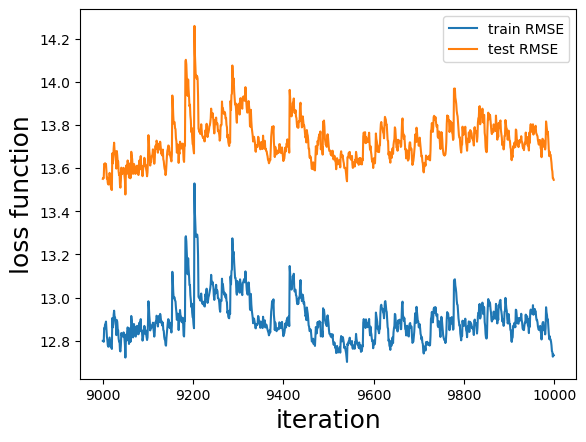

In [15]:
#last iterations
plt.plot(iteration[-1000:], loss_function_train_array_full_gd[-1000:], label = "train RMSE")
plt.plot(iteration[-1000:], loss_function_test_array_full_gd[-1000:], label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [16]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation

get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_en, src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, epsilon = 1e-7)

Nearest neighbors of "bicycle":
0.6940 - bicyclettes
0.6859 - bicyclette
0.6782 - vélo
0.6249 - cyclistes
0.6013 - cycliste


##### b. Test on a the whole test set

In [17]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, limit= 3000)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 81.8 %


In [18]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=1, limit= 3000)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 63.4 %


### 1bis. Gradient descent with Euler distance and no constraints (GD)

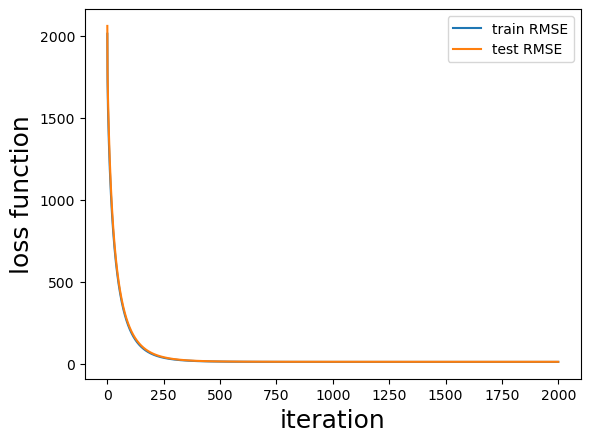

In [19]:
#high number of iteration
nb_of_iterations = 2000
step_size = 0.1

W_opt_full_gd,iteration,loss_function_train_array_full_gd, loss_function_test_array_full_gd  = gradient_descent(X_train, Y_train, X_test, Y_test, nb_of_iterations, step_size, early_stopping=False)

plt.plot(iteration, loss_function_train_array_full_gd, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_full_gd, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [20]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation

get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_en, src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, epsilon = 1e-7)

Nearest neighbors of "bicycle":
0.8033 - vélo
0.7403 - bicyclettes
0.7381 - bicyclette
0.6670 - cyclistes
0.6460 - motocyclette


##### b. Test on the whole test set

In [21]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, limit= 3000)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 82.6 %


In [22]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_gd, K=1, limit= 3000)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 67.0 %


### 2. Projected gradient descent with cosine similarity and orthogonal constraints

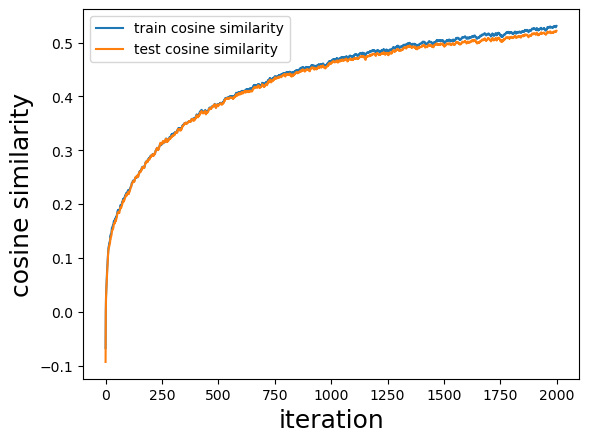

In [23]:
nb_of_iterations = 2000 #very long for a low number of iteratin, 2000 for comparison with classic GD, could put more (depend on our patience)
step_size = 1

W_opt_full_procuste,iteration,loss_function_train_array_full_procustes, loss_function_test_array_full_procustes  = batch_gradient_descent_full_procustes(X_train_normalized, Y_train_normalized, X_test_normalized, Y_test_normalized, nb_of_iterations, step_size, batch_percentage = 0.0001 , early_stopping = False)

plt.plot(iteration, loss_function_train_array_full_procustes, label = "train cosine similarity")
plt.plot(iteration, loss_function_test_array_full_procustes, label = "test cosine similarity")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("cosine similarity", rotation=90, fontsize=18)
plt.legend()
plt.show() 

##### a. Test on a single word

In [24]:
get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_en, src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_procuste, K=5, epsilon = 1e-7)

Nearest neighbors of "bicycle":
0.6511 - vélo
0.5956 - bicyclette
0.5802 - bicyclettes
0.5077 - motocyclette
0.4991 - automobiles


##### b. Test on the whole test set

In [25]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_procuste, limit=3000, K=5)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 78.4 %


In [26]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_full_procuste, limit=3000, K=1)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 61.2 %


### 3. Procrustes closed form solution

In [27]:
#no iteration, closed form solution 
U, S, V =  np.linalg.svd(X_train_normalized.T@Y_train_normalized)
W_opt_procrustes_closed = U@V

##### a. Test on a single word

In [28]:
get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_en, src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_procrustes_closed, K=5, epsilon = 1e-7)

Nearest neighbors of "bicycle":
0.7422 - vélo
0.6687 - bicyclette
0.6671 - bicyclettes
0.6173 - cyclistes
0.5438 - motocyclette


##### b. Test on the whole test set

In [29]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_procrustes_closed, limit=3000, K=5)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 86.0 %


In [30]:
good_translation_1 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_procrustes_closed, limit=3000, K=1)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P5 accuracy is {round(accuracy_1,2)} %")

The P5 accuracy is 70.2 %


### 4. Gradient descent with Euler distance and orthogonal constraints

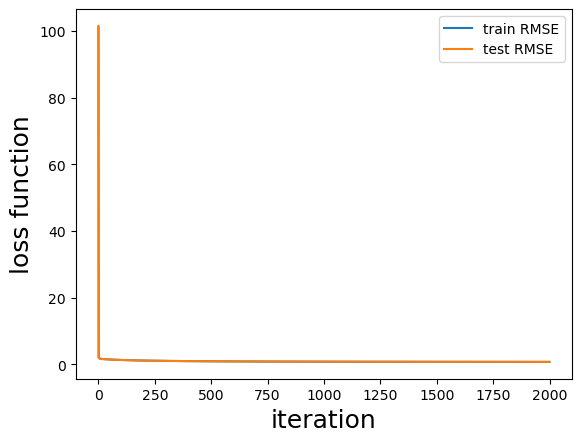

In [31]:
nb_of_iterations = 2000
step_size = 1

W_opt_projected_semi,iteration,loss_function_train_array_projected, loss_function_test_array_projected  = gradient_descent_projected(X_train_normalized,Y_train_normalized,X_test_normalized, Y_test_normalized, nb_of_iterations, step_size)

plt.plot(iteration, loss_function_train_array_projected, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_projected, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

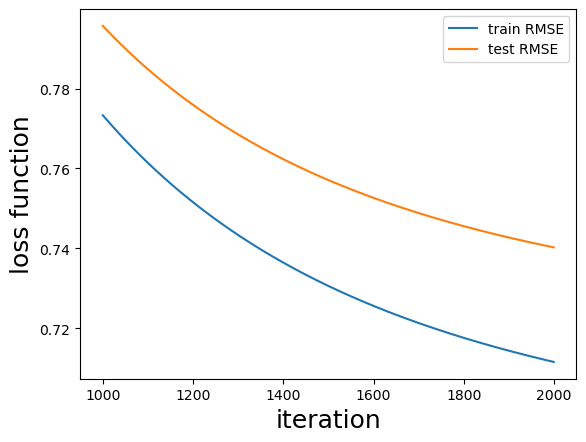

In [32]:
plt.plot(iteration[-1000:], loss_function_train_array_projected[-1000:], label = "train RMSE")
plt.plot(iteration[-1000:], loss_function_test_array_projected[-1000:], label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [33]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation
get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_en, src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_projected_semi, K=5, epsilon = 1e-7)

Nearest neighbors of "bicycle":
0.7161 - vélo
0.6622 - bicyclette
0.6518 - bicyclettes
0.5758 - cyclistes
0.5225 - motocyclette


##### b. Test on a the whole test set

In [36]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_projected_semi, limit=3000, K=5)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 86.0 %


In [37]:
good_translation_1 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_fr, tgt_emb = Y_test_full, W = W_opt_projected_semi, limit=3000, K=1)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P5 accuracy is {round(accuracy_1,2)} %")

The P5 accuracy is 69.8 %
